In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler

# Describe the data

In [2]:
df_fact = pd.read_csv('./data2/base/base_final.csv', index_col=0)

In [3]:
df_fact = df_fact[df_fact['Datetime_UTC'] >= '2020-01-01']

In [4]:
df_fact

,Prices_HU,Datetime_UTC,Prices_AT,Prices_RO,Actual_load_HU_mean,Actual_load_HU_min,Actual_load_HU_max,Actual_load_HU_sum,Actual_load_HU_std,Actual_load_HU_median,...,is_holiday_7d_AT,is_workday_HU,is_workday_2d_HU,is_workday_7d_HU,is_workday_RO,is_workday_2d_RO,is_workday_7d_RO,is_workday_AT,is_workday_2d_AT,is_workday_7d_AT
168,30.40,2020-01-01 00:00:00+00:00,38.60,145.270000,4101.60,3983.0,4173.0,82032.0,73.778046,4115.0,...,1.0,1,1,1,1,1,1,0,1,0
169,28.53,2020-01-01 01:00:00+00:00,36.55,136.330000,3827.00,3710.0,3896.0,76540.0,74.545641,3855.0,...,1.0,1,1,1,1,1,1,0,1,0
170,27.37,2020-01-01 02:00:00+00:00,32.32,130.790000,3622.40,3553.0,3671.0,72448.0,47.264541,3627.0,...,1.0,1,1,1,1,1,1,0,1,0
171,26.38,2020-01-01 03:00:00+00:00,30.85,126.060000,3552.00,3542.0,3566.0,71040.0,8.104580,3552.0,...,1.0,1,1,1,1,1,1,0,1,0
172,26.50,2020-01-01 04:00:00+00:00,30.14,126.630000,3570.00,3560.0,3581.0,71400.0,6.836435,3570.0,...,1.0,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41801,171.19,2024-09-30 17:00:00+00:00,102.28,171.190000,5892.00,5870.0,5905.0,188544.0,13.949217,5896.5,...,0.0,1,0,1,1,0,1,1,0,1
41802,113.24,2024-09-30 18:00:00+00:00,71.94,118.220000,5687.75,5563.0,5806.0,182008.0,92.183198,5691.0,...,0.0,1,0,1,1,0,1,1,0,1
41803,59.95,2024-09-30 19:00:00+00:00,44.99,60.500000,5299.00,5149.0,5436.0,169568.0,108.795161,5305.5,...,0.0,1,0,1,1,0,1,1,0,1
41804,50.81,2024-09-30 20:00:00+00:00,37.33,50.810000,4993.00,4916.0,5071.0,159776.0,57.782685,4992.5,...,0.0,1,0,1,1,0,1,1,0,1


In [5]:
df_fact.columns.to_list()

['Prices_HU',
 'Datetime_UTC',
 'Prices_AT',
 'Prices_RO',
 'Actual_load_HU_mean',
 'Actual_load_HU_min',
 'Actual_load_HU_max',
 'Actual_load_HU_sum',
 'Actual_load_HU_std',
 'Actual_load_HU_median',
 'Actual_load_HU_var',
 'Wind_onshore_HU_mean',
 'Wind_onshore_HU_min',
 'Wind_onshore_HU_max',
 'Wind_onshore_HU_sum',
 'Wind_onshore_HU_std',
 'Wind_onshore_HU_median',
 'Wind_onshore_HU_var',
 'temperature_2m_BP',
 'relative_humidity_2m_BP',
 'pressure_msl_BP',
 'surface_pressure_BP',
 'precipitation_BP',
 'rain_BP',
 'cloud_cover_BP',
 'cloud_cover_low_BP',
 'cloud_cover_mid_BP',
 'cloud_cover_high_BP',
 'shortwave_radiation_BP',
 'direct_radiation_BP',
 'diffuse_radiation_BP',
 'sunshine_duration_BP',
 'wind_speed_10m_BP',
 'wind_speed_100m_BP',
 'wind_direction_10m_BP',
 'wind_direction_100m_BP',
 'wind_gusts_10m_BP',
 'temperature_2m_Konstanca',
 'relative_humidity_2m_Konstanca',
 'pressure_msl_Konstanca',
 'surface_pressure_Konstanca',
 'precipitation_Konstanca',
 'rain_Konstanca'

# Create input df

In [6]:
target_cc = 'HU'
other_county_codes = ['AT', 'RO']

In [7]:
dow_dummies = [
    'dayofweek_1',
    'dayofweek_2',
    'dayofweek_3',
    'dayofweek_4',
    'dayofweek_5',
    'dayofweek_6'
]
month_dummies = [
    'month_2',
    'month_3',
    'month_4',
    'month_5',
    'month_6',
    'month_7',
    'month_8',
    'month_9',
    'month_10',
    'month_11',
    'month_12'
]
ymdhdw = [
    'year',
    'month',
    'day',
    'hour',
    'dayoftheweek'
]

In [8]:
def create_in_df(df_fact):
   df_in = df_fact[
      [
         'Datetime_UTC',
         'Prices_HU',
         'Prices_AT',
         'Prices_RO',
         'Actual_load_HU_mean',
         'Actual_load_HU_min',
         'Actual_load_HU_max',
         'Actual_load_HU_sum',
         'Actual_load_HU_std',
         'Actual_load_HU_median',
         'Actual_load_HU_var',
         'Wind_onshore_HU_mean',
         'Wind_onshore_HU_min',
         'Wind_onshore_HU_max',
         'Wind_onshore_HU_sum',
         'Wind_onshore_HU_std',
         'Wind_onshore_HU_median',
         'Wind_onshore_HU_var',
         'temperature_2m_BP',
         'relative_humidity_2m_BP',
         'pressure_msl_BP',
         'surface_pressure_BP',
         'precipitation_BP',
         'rain_BP',
         'cloud_cover_BP',
         'cloud_cover_low_BP',
         'cloud_cover_mid_BP',
         'cloud_cover_high_BP',
         'shortwave_radiation_BP',
         'direct_radiation_BP',
         'diffuse_radiation_BP',
         'sunshine_duration_BP',
         'wind_speed_10m_BP',
         'wind_speed_100m_BP',
         'wind_direction_10m_BP',
         'wind_direction_100m_BP',
         'wind_gusts_10m_BP',
         'temperature_2m_Konstanca',
         'relative_humidity_2m_Konstanca',
         'pressure_msl_Konstanca',
         'surface_pressure_Konstanca',
         'precipitation_Konstanca',
         'rain_Konstanca',
         'cloud_cover_Konstanca',
         'cloud_cover_low_Konstanca',
         'cloud_cover_mid_Konstanca',
         'cloud_cover_high_Konstanca',
         'shortwave_radiation_Konstanca',
         'direct_radiation_Konstanca',
         'diffuse_radiation_Konstanca',
         'sunshine_duration_Konstanca',
         'wind_speed_10m_Konstanca',
         'wind_speed_100m_Konstanca',
         'wind_direction_10m_Konstanca',
         'wind_direction_100m_Konstanca',
         'wind_gusts_10m_Konstanca',
         
         'Price_2d_HU',
         'Price_7d_HU',
         'Price_2d_AT',
         'Price_7d_AT',
         'Price_2d_RO',
         'Price_7d_RO',
         'is_weekday',
         'is_weekday_2d',
         'is_weekday_7d',
         'Price_2d_-1h_HU',
         'Price_2d_0h_HU',
         'Price_2d_+1h_HU',
         'Price_7d_-1h_HU',
         'Price_7d_0h_HU',
         'Price_7d_+1h_HU',
         'Price_2d_avg_HU',
         'Price_7d_avg_HU',
         'Price_2d_-1h_AT',
         'Price_2d_0h_AT',
         'Price_2d_+1h_AT',
         'Price_7d_-1h_AT',
         'Price_7d_0h_AT',
         'Price_7d_+1h_AT',
         'Price_2d_avg_AT',
         'Price_7d_avg_AT',
         'Price_2d_-1h_RO',
         'Price_2d_0h_RO',
         'Price_2d_+1h_RO',
         'Price_7d_-1h_RO',
         'Price_7d_0h_RO',
         'Price_7d_+1h_RO',
         'Price_2d_avg_RO',
         'Price_7d_avg_RO',
         'is_holiday_HU',
         'is_holiday_RO',
         'is_holiday_AT',
         'is_workday_HU',
         'is_workday_RO',
         'is_workday_AT',
         'is_holiday_2d_HU',
         'is_holiday_7d_HU',
         'is_holiday_2d_AT',
         'is_holiday_7d_AT',
         'is_holiday_2d_RO',
         'is_holiday_7d_RO'
      ] + dow_dummies + month_dummies + ymdhdw
   ]
   return df_in

In [9]:
df_in = create_in_df(df_fact)

In [57]:
# rename Datetime_UTC to datetime
df_in = df_in.rename(columns={'Datetime_UTC': 'Datetime'})

In [10]:
#unlimit cols
pd.set_option('display.max_columns', None)

In [11]:
df_in

,Datetime_UTC,Prices_HU,Prices_AT,Prices_RO,Actual_load_HU_mean,Actual_load_HU_min,Actual_load_HU_max,Actual_load_HU_sum,Actual_load_HU_std,Actual_load_HU_median,Actual_load_HU_var,Wind_onshore_HU_mean,Wind_onshore_HU_min,Wind_onshore_HU_max,Wind_onshore_HU_sum,Wind_onshore_HU_std,Wind_onshore_HU_median,Wind_onshore_HU_var,temperature_2m_BP,relative_humidity_2m_BP,pressure_msl_BP,surface_pressure_BP,precipitation_BP,rain_BP,cloud_cover_BP,cloud_cover_low_BP,cloud_cover_mid_BP,cloud_cover_high_BP,shortwave_radiation_BP,direct_radiation_BP,diffuse_radiation_BP,sunshine_duration_BP,wind_speed_10m_BP,wind_speed_100m_BP,wind_direction_10m_BP,wind_direction_100m_BP,wind_gusts_10m_BP,temperature_2m_Konstanca,relative_humidity_2m_Konstanca,pressure_msl_Konstanca,surface_pressure_Konstanca,precipitation_Konstanca,rain_Konstanca,cloud_cover_Konstanca,cloud_cover_low_Konstanca,cloud_cover_mid_Konstanca,cloud_cover_high_Konstanca,shortwave_radiation_Konstanca,direct_radiation_Konstanca,diffuse_radiation_Konstanca,sunshine_duration_Konstanca,wind_speed_10m_Konstanca,wind_speed_100m_Konstanca,wind_direction_10m_Konstanca,wind_direction_100m_Konstanca,wind_gusts_10m_Konstanca,Price_2d_HU,Price_7d_HU,Price_2d_AT,Price_7d_AT,Price_2d_RO,Price_7d_RO,is_weekday,is_weekday_2d,is_weekday_7d,Price_2d_-1h_HU,Price_2d_0h_HU,Price_2d_+1h_HU,Price_7d_-1h_HU,Price_7d_0h_HU,Price_7d_+1h_HU,Price_2d_avg_HU,Price_7d_avg_HU,Price_2d_-1h_AT,Price_2d_0h_AT,Price_2d_+1h_AT,Price_7d_-1h_AT,Price_7d_0h_AT,Price_7d_+1h_AT,Price_2d_avg_AT,Price_7d_avg_AT,Price_2d_-1h_RO,Price_2d_0h_RO,Price_2d_+1h_RO,Price_7d_-1h_RO,Price_7d_0h_RO,Price_7d_+1h_RO,Price_2d_avg_RO,Price_7d_avg_RO,is_holiday_HU,is_holiday_RO,is_holiday_AT,is_workday_HU,is_workday_RO,is_workday_AT,is_holiday_2d_HU,is_holiday_7d_HU,is_holiday_2d_AT,is_holiday_7d_AT,is_holiday_2d_RO,is_holiday_7d_RO,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year,month,day,hour,dayoftheweek
168,2020-01-01 00:00:00+00:00,30.40,38.60,145.270000,4101.60,3983.0,4173.0,82032.0,73.778046,4115.0,5443.200000,190.00,187.0,193.0,3800.0,2.752989,190.0,7.578947,0.971000,84.616310,1030.6,1015.95470,0.0,0.0,8.4,3.0,0.0,19.0,0.0,0.0,0.0,0.0,19.453327,36.911850,308.99100,314.60492,37.440000,0.915500,76.59017,1020.9,1013.67694,0.0,0.0,65.700005,2.0,94.0,25.0,0.0,0.0,0.0,0.0,13.684735,26.552288,296.56497,310.60123,26.640000,17.11,8.38,15.96,20.03,30.00,40.00,True,True,True,22.20,17.11,13.96,NaN,8.38,4.02,17.756667,6.200000,16.38,15.96,11.80,NaN,20.03,15.84,14.713333,17.935000,40.00,30.00,10.00,NaN,40.00,19.18,26.666667,29.590000,0.0,0.0,1.0,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2020,1,1,0,2
169,2020-01-01 01:00:00+00:00,28.53,36.55,136.330000,3827.00,3710.0,3896.0,76540.0,74.545641,3855.0,5557.052632,164.20,142.0,178.0,3284.0,14.515328,169.0,210.694737,0.921000,85.859810,1031.3,1016.64197,0.0,0.0,2.7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,18.844202,36.473880,313.45190,318.60138,36.360000,1.765500,71.26234,1021.0,1013.79850,0.0,0.0,57.900000,0.0,96.0,1.0,0.0,0.0,0.0,0.0,14.021525,26.230639,299.19740,313.33170,25.199999,13.96,4.02,11.80,15.84,10.00,19.18,True,True,True,17.11,13.96,10.99,8.38,4.02,2.10,14.020000,4.833333,15.96,11.80,6.26,20.03,15.84,11.96,11.340000,15.943333,30.00,10.00,25.00,40.00,19.18,10.00,21.666667,23.060000,0.0,0.0,1.0,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2020,1,1,1,2
170,2020-01-01 02:00:00+00:00,27.37,32.32,130.790000,3622.40,3553.0,3671.0,72448.0,47.264541,3627.0,2233.936842,145.00,139.0,156.0,2900.0,6.774565,142.0,45.894737,0.571000,88.053310,1031.2,1016.52480,0.0,0.0,0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.819090,35.082920,315.00010,321.24835,35.280000,2.065500,67.95994,1021.1,1013.90570,0.0,0.0,3.000000,0.0,5.0,0.0,0.0,0.0,0.0

In [12]:
# drop last row to avoid NaNs
df_in = df_in[:-1]

In [13]:
df_in.isna().sum()[df_in.isna().sum() > 0]

Price_7d_-1h_HU    1
Price_7d_-1h_AT    1
Price_7d_-1h_RO    1
dtype: int64

In [14]:
# fill Price_7d_-1h_{country} with next value
df_in.loc[:, 'Price_7d_-1h_HU'] = df_in['Price_7d_-1h_HU'].bfill()
df_in.loc[:, 'Price_7d_-1h_AT'] = df_in['Price_7d_-1h_AT'].bfill()
df_in.loc[:, 'Price_7d_-1h_RO'] = df_in['Price_7d_-1h_RO'].bfill()

In [15]:
df_in.isna().sum()[df_in.isna().sum() > 0]

Series([], dtype: int64)

In [16]:
target_col = f'Prices_{target_cc}'

# Scale

In [ ]:
scaler = StandardScaler()
# fit and transform but exclude datetime_UTC
df_in.loc[:, df_in.columns != 'Datetime'] = scaler.fit_transform(df_in.loc[:, df_in.columns != 'Datetime'])


In [22]:
df_in

,Datetime_UTC,Prices_HU,Prices_AT,Prices_RO,Actual_load_HU_mean,Actual_load_HU_min,Actual_load_HU_max,Actual_load_HU_sum,Actual_load_HU_std,Actual_load_HU_median,Actual_load_HU_var,Wind_onshore_HU_mean,Wind_onshore_HU_min,Wind_onshore_HU_max,Wind_onshore_HU_sum,Wind_onshore_HU_std,Wind_onshore_HU_median,Wind_onshore_HU_var,temperature_2m_BP,relative_humidity_2m_BP,pressure_msl_BP,surface_pressure_BP,precipitation_BP,rain_BP,cloud_cover_BP,cloud_cover_low_BP,cloud_cover_mid_BP,cloud_cover_high_BP,shortwave_radiation_BP,direct_radiation_BP,diffuse_radiation_BP,sunshine_duration_BP,wind_speed_10m_BP,wind_speed_100m_BP,wind_direction_10m_BP,wind_direction_100m_BP,wind_gusts_10m_BP,temperature_2m_Konstanca,relative_humidity_2m_Konstanca,pressure_msl_Konstanca,surface_pressure_Konstanca,precipitation_Konstanca,rain_Konstanca,cloud_cover_Konstanca,cloud_cover_low_Konstanca,cloud_cover_mid_Konstanca,cloud_cover_high_Konstanca,shortwave_radiation_Konstanca,direct_radiation_Konstanca,diffuse_radiation_Konstanca,sunshine_duration_Konstanca,wind_speed_10m_Konstanca,wind_speed_100m_Konstanca,wind_direction_10m_Konstanca,wind_direction_100m_Konstanca,wind_gusts_10m_Konstanca,Price_2d_HU,Price_7d_HU,Price_2d_AT,Price_7d_AT,Price_2d_RO,Price_7d_RO,is_weekday,is_weekday_2d,is_weekday_7d,Price_2d_-1h_HU,Price_2d_0h_HU,Price_2d_+1h_HU,Price_7d_-1h_HU,Price_7d_0h_HU,Price_7d_+1h_HU,Price_2d_avg_HU,Price_7d_avg_HU,Price_2d_-1h_AT,Price_2d_0h_AT,Price_2d_+1h_AT,Price_7d_-1h_AT,Price_7d_0h_AT,Price_7d_+1h_AT,Price_2d_avg_AT,Price_7d_avg_AT,Price_2d_-1h_RO,Price_2d_0h_RO,Price_2d_+1h_RO,Price_7d_-1h_RO,Price_7d_0h_RO,Price_7d_+1h_RO,Price_2d_avg_RO,Price_7d_avg_RO,is_holiday_HU,is_holiday_RO,is_holiday_AT,is_workday_HU,is_workday_RO,is_workday_AT,is_holiday_2d_HU,is_holiday_7d_HU,is_holiday_2d_AT,is_holiday_7d_AT,is_holiday_2d_RO,is_holiday_7d_RO,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year,month,day,hour,dayoftheweek
168,2020-01-01 00:00:00+00:00,-0.826772,-0.708232,-0.276956,-1.054266,-1.129124,-1.035742,-1.836459,0.722685,-1.037266,0.289031,1.657859,1.680742,1.632159,0.811390,0.186276,1.656905,-0.092451,-1.287288,0.727491,1.695146,1.646161,-0.185601,-0.17969,-0.908268,-0.479634,-0.787244,-0.498077,-0.686213,-0.581016,-0.746003,-0.765539,1.566726,2.052221,0.970928,1.057517,1.418341,-1.470785,0.245989,0.608018,0.571928,-0.182726,-0.173985,0.793072,-0.510592,1.994771,-0.205871,-0.698732,-0.600245,-0.756207,-0.786019,0.072682,0.507582,0.922852,1.115766,0.086519,-0.941368,-1.015471,-0.912480,-0.874838,-1.258313,-1.175888,0.632743,0.631738,0.632743,-0.897344,-0.941368,-0.968621,-1.015439,-1.015471,-1.053177,-0.948867,-1.048725,-0.908667,-0.912480,-0.950056,-0.874815,-0.874838,-0.912675,-0.930239,-0.900021,-1.173251,-1.258313,-1.428422,-1.175861,-1.175888,-1.353139,-1.314813,-1.292188,-0.130384,-0.16687,5.283425,0.645267,0.662333,-1.479564,-0.130384,-0.130384,-0.189271,5.194406,-0.16687,-0.16687,-0.407441,2.448564,-0.408403,-0.408403,-0.408403,-0.408403,-0.298575,-0.313224,-0.307644,-0.313224,-0.307644,-0.313224,-0.313224,-0.307503,-0.277447,-0.272597,-0.277447,-1.379425,-1.566704,-1.673885,-1.661294,-0.500707
169,2020-01-01 01:00:00+00:00,-0.842940,-0.726740,-0.352940,-1.410536,-1.485033,-1.393746,-2.000360,0.744829,-1.373785,0.306654,1.290793,1.030647,1.422377,0.561045,4.157613,1.358296,3.017072,-1.292758,0.791860,1.781230,1.733099,-0.185601,-0.17969,-1.062949,-0.479634,-0.787244,-0.938947,-0.686213,-0.581016,-0.746003,-0.765539,1.460584,2.005056,1.011023,1.094508,1.319916,-1.372908,-0.071894,0.621535,0.588663,-0.182726,-0.173985,0.581583,-0.568078,2.051305,-0.780343,-0.698732,-0.600245,-0.756207,-0.786019,0.128066,0.473345,0.946703,1.139980,-0.040148,-0.968601,-1.053149,-0.950035,-0.912654,-1.428399,-1.353116,0.632743,0.631738,0.632743,-0.941348,-0.968601,-0.994297,-1.015439,-1.053149,-1.069769,-0.981623,-1.060700,-0.912458,-0.950

# Outliers

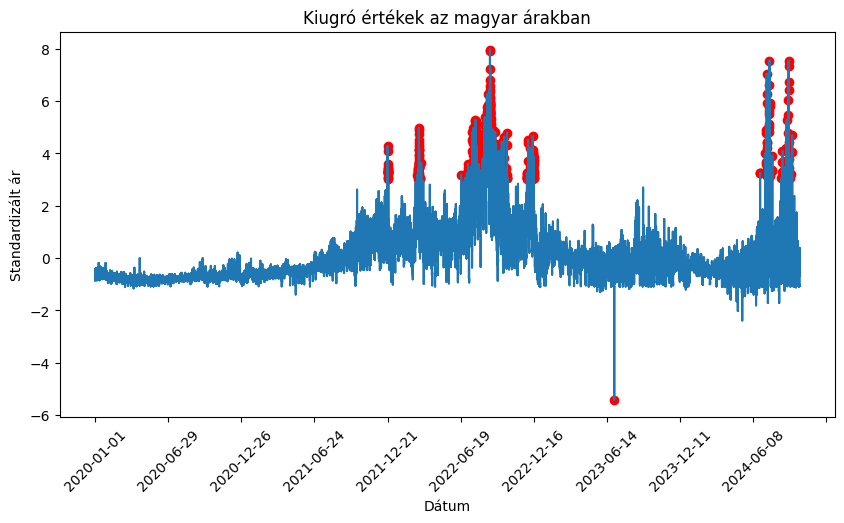

In [ ]:
# detect outliers in the target col
data = df_in[target_col].values
z_scores = np.abs((data - np.mean(data)) / np.std(data))
outliers = np.where(z_scores > 3)

#plot outliers
# set the x axis label and ticks df_fact['Datetime']
fig, ax = plt.subplots()

figsize = (10, 5)
fig.set_size_inches(figsize)

ax.plot(df_fact['date'][:-1], data)
ax.scatter(df_fact['date'].iloc[outliers], data[outliers], color='red')
ax.set_xlabel('Dátum')
ax.set_ylabel('Standardizált ár')
# set major ticks locator to 6 months and print only the date
ax.xaxis.set_major_locator(ticker.MultipleLocator(6*30))

plt.xticks(rotation=45)
plt.title('Kiugró értékek az magyar árakban')
plt.show()


In [24]:
# search the minimum in df_fact['Prices_HU']
min_idx = df_fact['Prices_HU'].idxmin()
min_idx

30852

In [25]:
df_min = df_fact.loc[min_idx-24:min_idx+24]

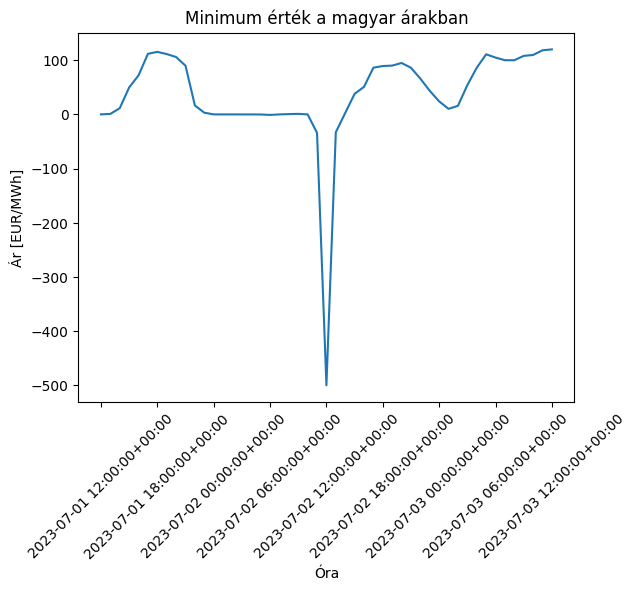

In [ ]:
# plot the minimum
plt.plot(df_min['Datetime'], df_min['Prices_HU'])
plt.xlabel('Óra')
plt.ylabel('Ár [EUR/MWh]')

# print oly every 24th x tick
plt.xticks(df_min['Datetime'][::6], rotation=45) 

plt.xticks(rotation=45)
plt.title('Minimum érték a magyar árakban')
plt.show()



# Evaluation metric

In [27]:
def base_eval(y_true, y_pred, do_print=True):
    error = np.mean(abs(y_true - y_pred))
    if do_print:
        print(f'Base evaluation (abs error): {error}')
    return error

In [28]:
def weighted_eval(y_true, y_pred, load, do_print=True):
    error = np.mean(abs((y_true - y_pred)*load))
    if do_print:
        print(f'Weighted evaluation (abs error): {error}')
    return error

# Plot functions

In [76]:
def plot_predictions(y_true, y_pred, model_name, x_ticks=None, x_tick_labels=None):
    plt.figure(figsize=(15, 5))
    plt.plot(y_true, label='Valós')
    plt.plot(y_pred, label='Jósolt')
    plt.xlabel('Dátum')
    plt.ylabel('Ár')
    if x_ticks is not None:
        plt.xticks(x_ticks, x_tick_labels)
        plt.xticks(rotation=45)
    plt.title(model_name)
    plt.legend(['Valós', 'Jósolt'])
    plt.show()

In [77]:
def plot_predictions_by_df(plot_df, model_name):
    plt.figure(figsize=(15, 5))
    plt.plot(plot_df['True'], label='True')
    plt.plot(plot_df['Predicted'], label='Predicted')
    plt.xlabel('Dátum')
    plt.ylabel('Ár')

    #xtick only every 12 hours but show datetimes
    x_ticks = np.arange(0, len(plot_df), 12)
    x_tick_labels = plot_df['Datetime'].iloc[x_ticks]
    plt.xticks(x_ticks, x_tick_labels)
    plt.xticks(rotation=45)
    

    plt.title(model_name)
    plt.legend(['Valós', 'Jósolt'])
    plt.show()
    

In [90]:
def plot_feature_importances(importances):
    importances = dict(importances)
    importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
    plt.figure()
    plt.bar(importances.keys(), importances.values())
    plt.xticks(rotation=45)
    plt.title('Feature importances')
    plt.show()

# create a function like plot_feature_importances but rotated 90 degrees
def plot_feature_importances_rotated(importances, N = None):
    importances = dict(importances)
    importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=False)}
    # get the first N
    if N is not None:
        importances = dict(list(importances.items())[-N:])
    plt.figure()
    plt.barh(list(importances.keys()), list(importances.values()))
    plt.title('Feature importances')
    plt.show()

In [72]:
def plot_losses(base_loss, weighted_loss):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(base_loss, label='Base loss')
    ax.set_ylabel('Base loss', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax.twinx()
    ax2.plot(weighted_loss, color='tab:orange', label='Weighted loss')
    ax2.set_ylabel('Weighted loss', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    fig.legend()
    plt.title(f'Losses (Base loss:{np.mean(base_loss):.2f}, Weighted loss: {np.mean(weighted_loss):.2f}, Mean base loss: {np.mean(base_loss):.2f})')
    plt.show()

In [73]:
def plot_two_importances_change(feature_importances, col_a, col_b):
    imp_a = []
    imp_b = []
    for fi in feature_importances:
        imp_a.append([x[1] for x in fi if x[0] == col_a][0])
        imp_b.append([x[1] for x in fi if x[0] == col_b][0])

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(imp_a, label=col_a)
    ax.set_ylabel(col_a, color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax.twinx()
    ax2.plot(imp_b, color='tab:orange', label=col_b)
    ax2.set_ylabel(col_b, color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    #set x labels
    x_ticks = np.arange(0, len(imp_a), 12)
    x_tick_labels = np.arange(0, len(imp_a), 12)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels)
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels(x_tick_labels)
    

    fig.legend()
    plt.title(f'Feature importances of {col_a} and {col_b}')

In [66]:
def get_plot_df_and_ticks(df_in, pred, target_col, n_days, test_period_start):
    x_ticks = np.arange(0, n_days*24)
    x_tick_labels = df_in.loc[df_in['Datetime'] >= test_period_start, 'Datetime'].astype(str).to_list()[-n_days*24:]

    df_plot = pd.DataFrame({'Datetime': df_in.loc[df_in['Datetime'] >= test_period_start, 'Datetime'].to_list()[-n_days*24:], 'True': df_in.loc[df_in['Datetime'] >= test_period_start, target_col].to_list()[-n_days*24:], 'Predicted': pred[-n_days*24:]})
    return (df_plot, x_ticks, x_tick_labels)

In [67]:
def plot_all_importances_change(feature_importances, top_N = 10, base_loss = None):
    #get the top_N features by their max importance
    top_N_features = []
    for fi in feature_importances:
        for i in range(top_N):
            if fi[i][0] not in top_N_features:
                top_N_features.append(fi[i][0])
    
    #plot the change of importance of the top_N features on the same plot
    fig, ax = plt.subplots(figsize=(15, 5))
    for feature in top_N_features:
        imp = []
        for fi in feature_importances:
            imp.append([x[1] for x in fi if x[0] == feature][0])
        ax.plot(imp, label=feature)
    
    #plot the base loss if it is given use other y axis and use black color
    if base_loss is not None:
        ax2 = ax.twinx()
        ax2.plot(base_loss, color='black', label='Base loss', linestyle='--')
        ax2.set_ylabel('Base loss', color='black')
        ax2.tick_params(axis='y', labelcolor='black')
        ax2.legend()

    ax.set_ylabel('Importance')
    ax.tick_params(axis='y')
    ax.legend()
    plt.title('Feature importances change')
    

# Framework

With this framework we can predict the prices for a couple of days and after predicting for a day the model train again with the new data.

In [36]:
from tqdm import tqdm
import xgboost as xgb

In [ ]:
test_period_start = pd.to_datetime('2024-01-01 09:00:00+00:00')
test_period_end = df_fact.iloc[-1]['Datetime']

In [ ]:
input_cols = [col for col in df_in.columns if col != target_col and col != 'Datetime' and col != f'Load_avg_{target_cc}']

In [ ]:
def do_modeling(model, df, input_cols, target_col, penalty_delta_days=-10000):
    model_base_loss = []
    model_weighted_loss = []
    model_pred = []

    feature_importances = []
    
    start_date = None
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    for date in tqdm(pd.date_range(start=test_period_start, end=test_period_end, freq='D')):
        next_day = date + pd.Timedelta(days=1)

        if start_date is None:
            X_train = df.loc[(df['Datetime'] < date), input_cols]
            y_train = df.loc[(df['Datetime'] < date), target_col]
            X_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), input_cols]
            y_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), target_col]
        else:
            X_train = df.loc[(df['Datetime'] >= start_date) & (df['Datetime'] < date), input_cols]
            y_train = df.loc[(df['Datetime'] >= start_date) & (df['Datetime'] < date), target_col]
            X_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), input_cols]
            y_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), target_col]

        loads = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), f'Actual_load_{target_cc}_mean']

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        model_pred.extend(pred)
        
        base_loss = base_eval(y_test, pred, do_print=False)

        model_base_loss.append(base_loss)
        model_weighted_loss.append(weighted_eval(y_test, pred, loads, do_print=False))

        if base_loss >= 25:
            start_date = date + pd.Timedelta(days=penalty_delta_days)

        try:
            fi = zip(X_train.columns, model.feature_importances_)
            #order fi
            fi = sorted(fi, key=lambda x: x[1], reverse=True)
            fi = list(fi)
            feature_importances.append(fi)

        except:
            feature_importances.append(None)
    
    return (model, model_base_loss, model_weighted_loss, model_pred, feature_importances)

# GBR

In [53]:
max_depth = 3
penalty_delta_days = -144

In [54]:
gbr = xgb.XGBRegressor(random_state = 42, max_depth = max_depth, tree_method = 'hist', device = 'cuda:0', n_estimators = 500)
output = do_modeling(gbr, df_in, input_cols, target_col, penalty_delta_days)
gbr, gbr_base_loss, gbr_weighted_loss, gbr_pred, gbr_feature_importances = output

C:\Users\proha\AppData\Local\Temp\ipykernel_29896\1336310207.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime_UTC'] = pd.to_datetime(df['Datetime_UTC'])
100%|██████████| 274/274 [05:20<00:00,  1.17s/it]


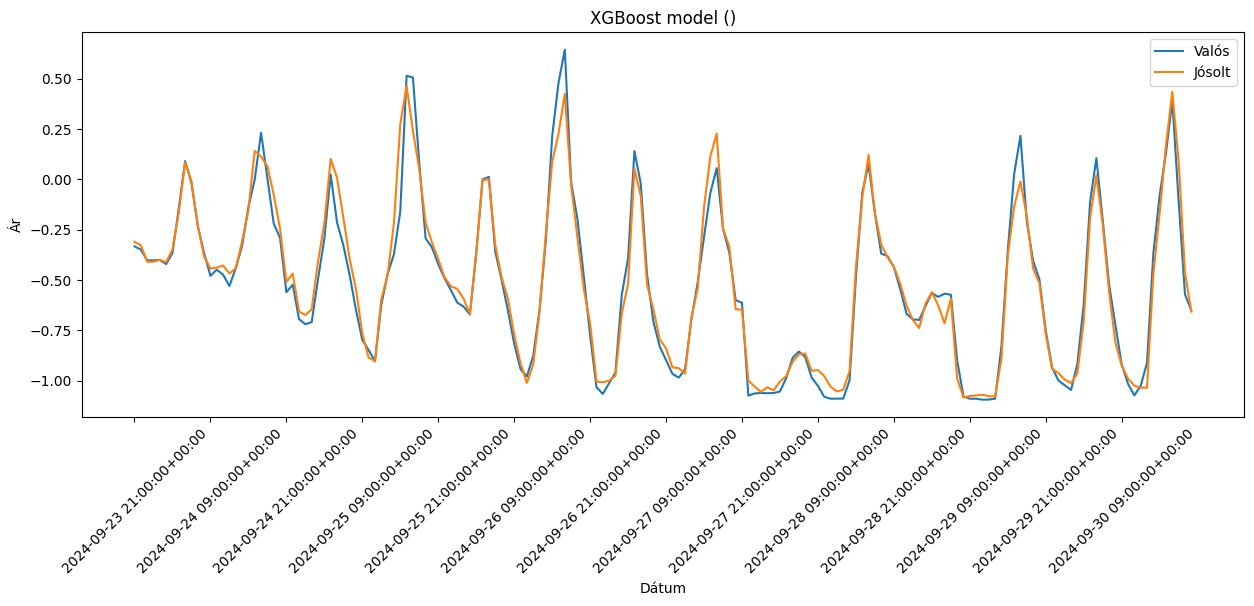

In [79]:
plot_df, xt, xtl = get_plot_df_and_ticks(df_in, gbr_pred, target_col, 7, test_period_start)
plot_predictions_by_df(plot_df, 'XGBoost model ()')

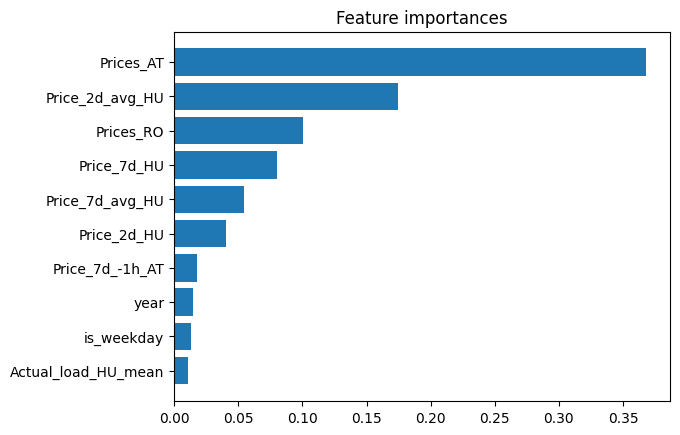

In [92]:
plot_feature_importances_rotated(gbr_feature_importances[-1], 10)

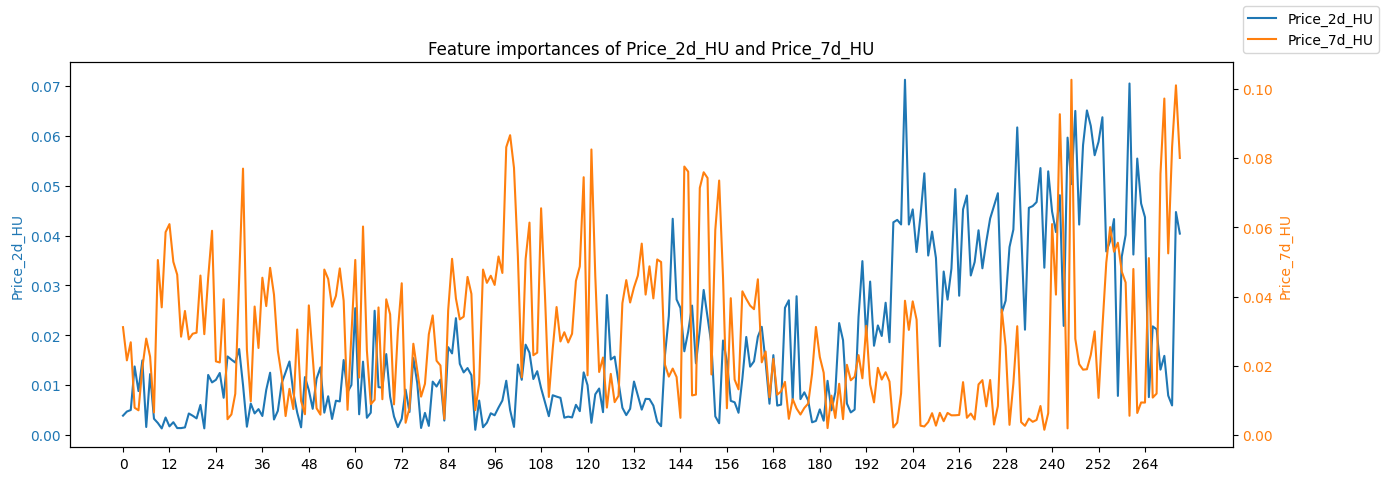

In [93]:
plot_two_importances_change(gbr_feature_importances, 'Price_2d_HU', 'Price_7d_HU')

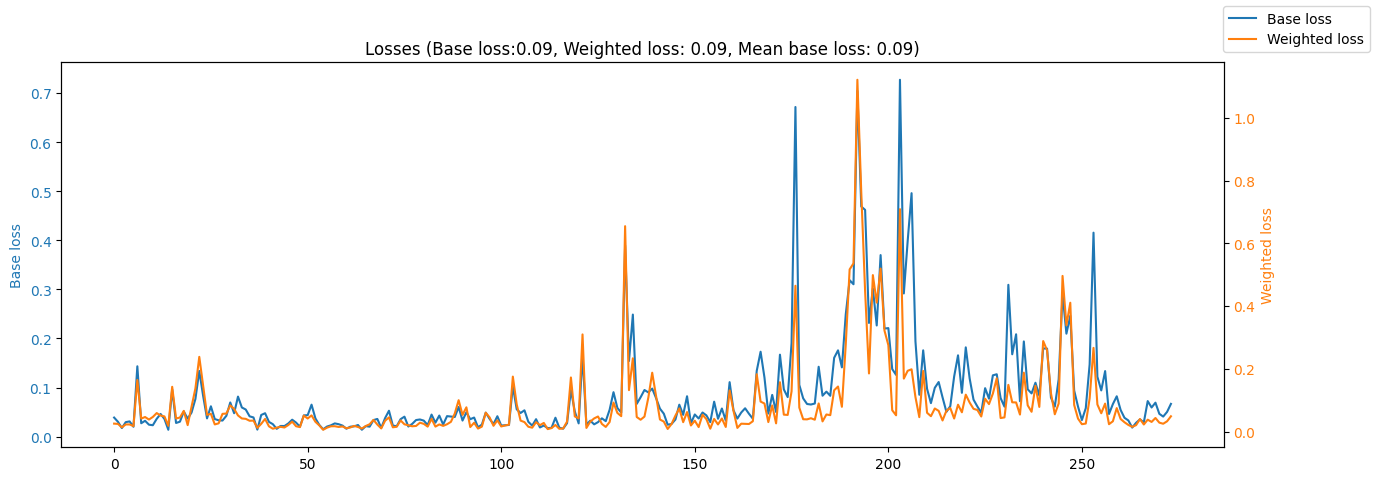

In [94]:
plot_losses(gbr_base_loss, gbr_weighted_loss)

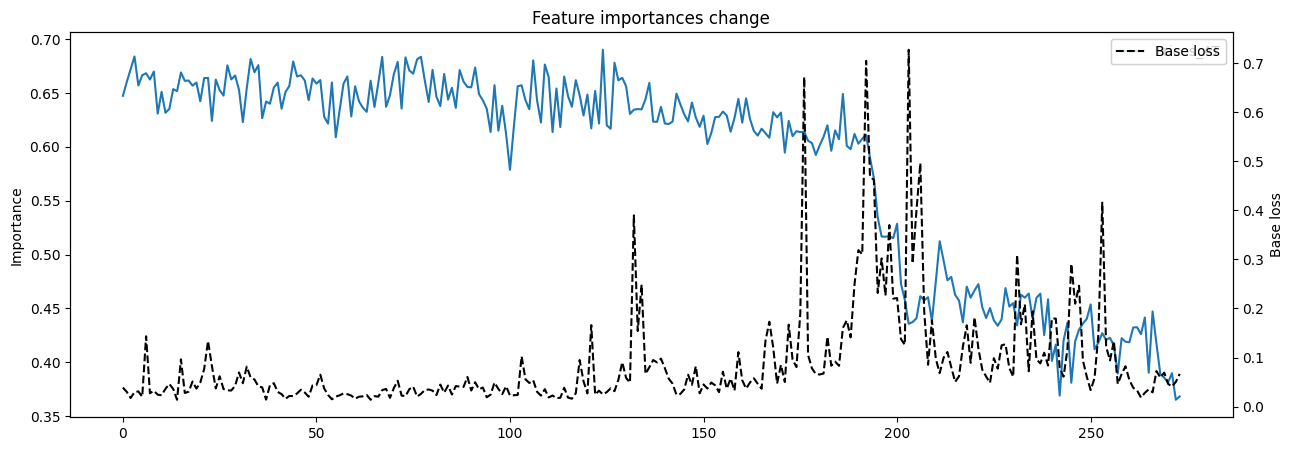

In [95]:
plot_all_importances_change(gbr_feature_importances, 1, gbr_base_loss)

In [96]:
# if df_losses is not defined, read it from the file
df_losses = pd.read_csv('./data/losses/xgboost_losses.csv', index_col=0)

In [97]:
#insert a row to the dataframe
df_losses.loc[-1] = ['XGBoost', max_depth, penalty_delta_days, sum(gbr_base_loss), np.mean(gbr_base_loss), sum(gbr_weighted_loss), np.mean(gbr_weighted_loss)]
df_losses.reset_index(drop=True, inplace=True)

In [98]:
df_losses

,Model,MaxDepth,DeltaDays,SumBase,MeanBase,SumWeighted,MeanWeighted
0,XGBoost,3,-7,1041.808789,12.402486,5.573488e+06,66351.045997
1,XGBoost,4,-7,1051.411541,12.516804,5.615239e+06,66848.084173
2,XGBoost,5,-7,1072.809840,12.771546,5.724059e+06,68143.560741
3,XGBoost,3,-14,1040.211955,12.383476,5.560301e+06,66194.063740
4,XGBoost,3,-21,1014.412915,12.076344,5.415796e+06,64473.756533
5,XGBoost,3,-210,1151.254187,13.705407,6.056288e+06,72098.661280
6,XGBoost,3,-144,1090.464670,12.981722,5.795740e+06,68996.900382
7,XGBoost,3,-144,1090.464670,12.981722,5.795740e+06,68996.900382
8,XGBoost,3,-144,1090.464670,12.981722,5.795740e+06,68996.900382
9,XGBoost,3,-144,1090.464670,12.981722,5.795740e+06,68996.900382


In [99]:
df_losses.to_csv('./data/losses/xgboost_losses.csv')

# Baseline

In [58]:
def do_modeling_baseline(df, input_cols, target_col):
    model_base_loss = []
    model_weighted_loss = []
    model_pred = []
    
    start_date = None

    for date in tqdm(pd.date_range(start=test_period_start, end=test_period_end, freq='D')):
        next_day = date + pd.Timedelta(days=1)

        if start_date is None:
            X_train = df.loc[(df['Datetime'] < date), input_cols]
            y_train = df.loc[(df['Datetime'] < date), target_col]
            X_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), input_cols]
            y_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), target_col]
        else:
            X_train = df.loc[(df['Datetime'] >= start_date) & (df['Datetime'] < date), input_cols]
            y_train = df.loc[(df['Datetime'] >= start_date) & (df['Datetime'] < date), target_col]
            X_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), input_cols]
            y_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), target_col]

        loads = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), f'Actual_load_{target_cc}_mean']

        #pred = the timedelta -7 days value
        pred = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), 'Price_7d_HU']


        model_pred.extend(pred)
        
        base_loss = base_eval(y_test, pred, do_print=False)

        model_base_loss.append(base_loss)
        model_weighted_loss.append(weighted_eval(y_test, pred, loads, do_print=False))

    
    return (model_base_loss, model_weighted_loss, model_pred)

In [45]:
output = do_modeling_baseline(df_in, input_cols, target_col)
baseline_base_loss, baseline_weighted_loss, baseline_pred  = output


100%|██████████| 274/274 [00:15<00:00, 17.95it/s]


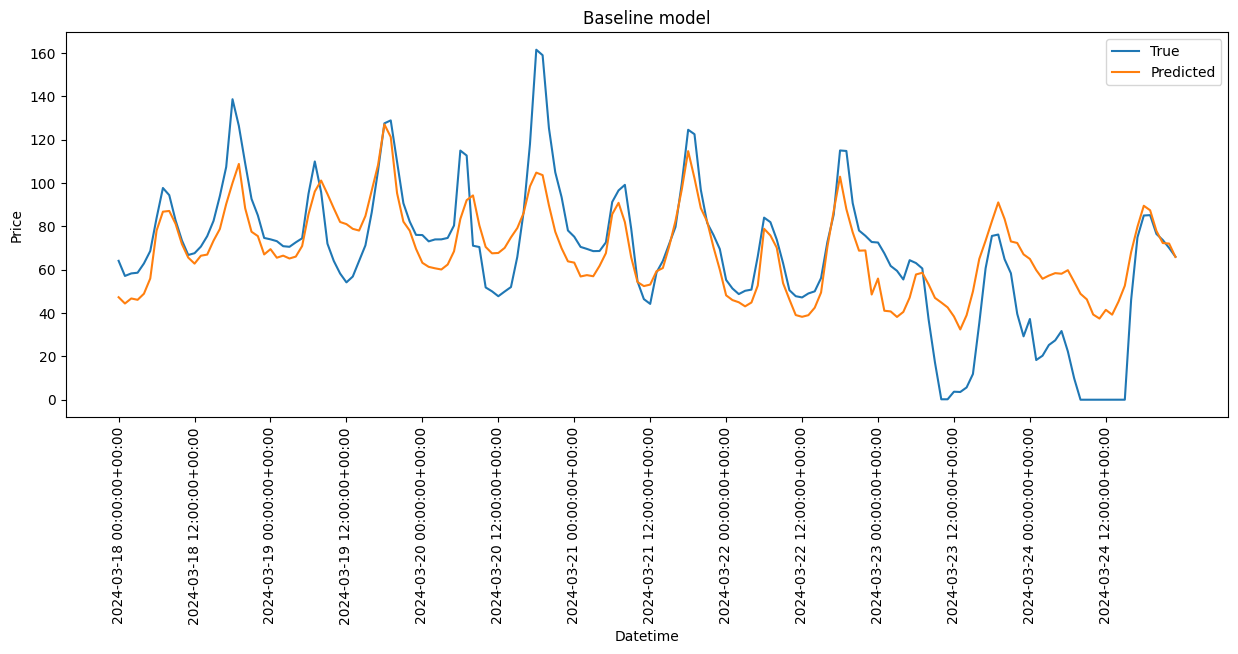

In [38]:
plot_df, xt, xtl = get_plot_df_and_ticks(df_in, baseline_pred, target_col, 7, test_period_start)
plot_predictions_by_df(plot_df, 'Baseline model')

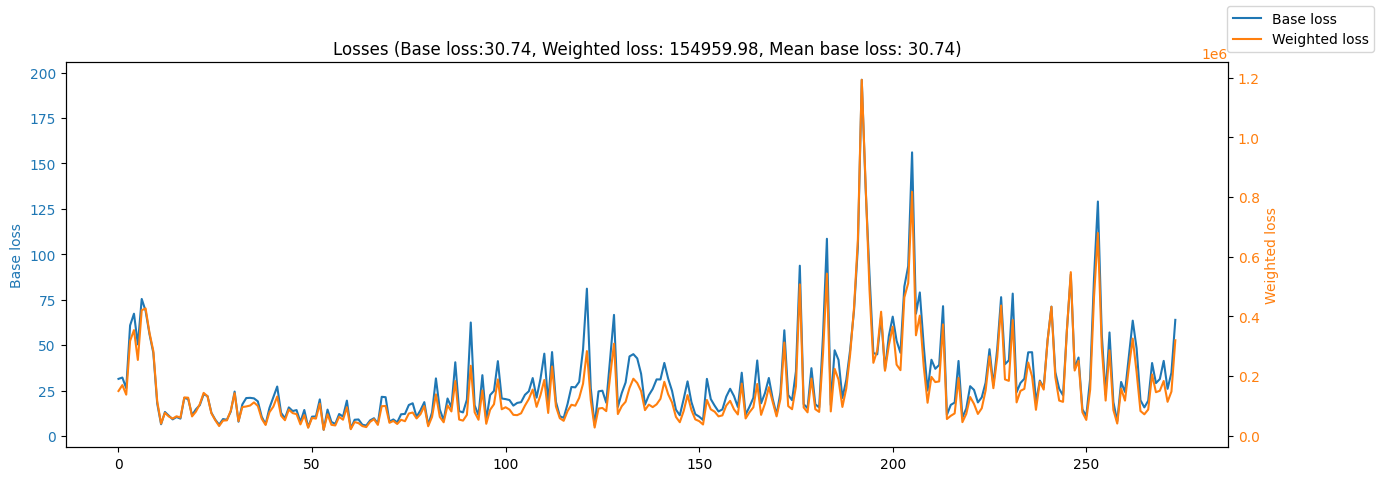

In [46]:
plot_losses(baseline_base_loss, baseline_weighted_loss)

# Decision tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dtr = DecisionTreeRegressor(random_state=42, max_depth=24)
output = do_modeling(dtr, df_in, input_cols, target_col)
dtr, dtr_base_loss, dtr_weighted_loss, dtr_pred, dtr_feature_importances = output

100%|██████████| 274/274 [26:12<00:00,  5.74s/it]


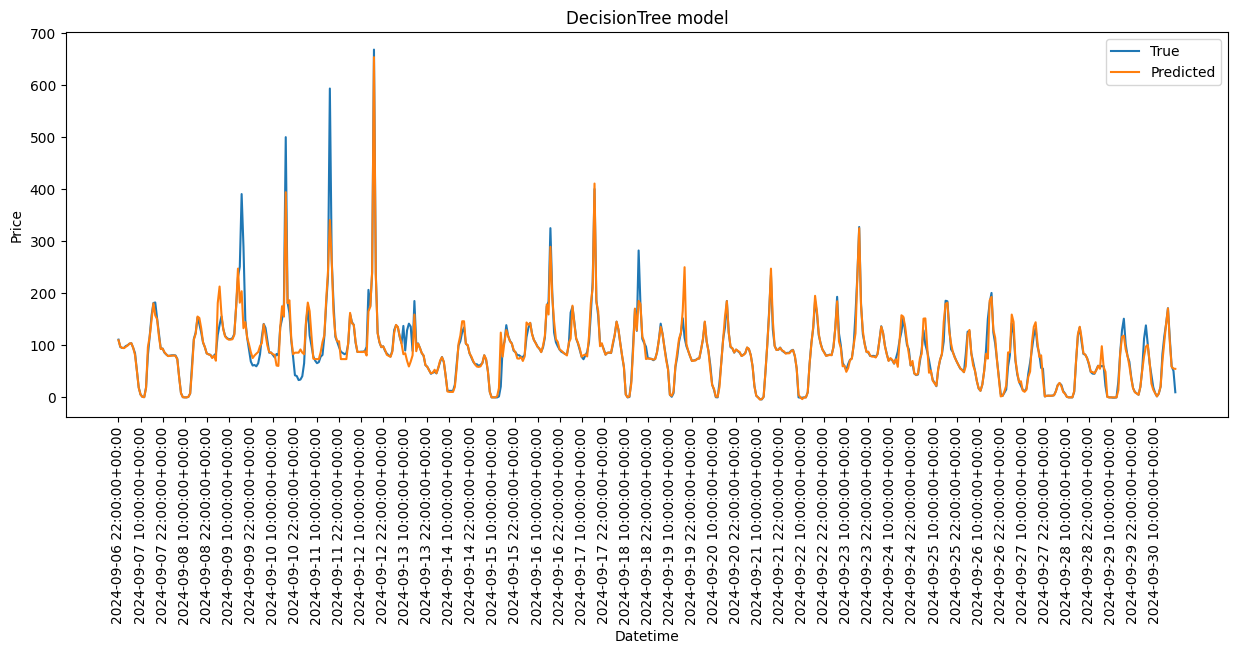

In [49]:
df_plot_dtr, xt_dtr, xtl_dtr = get_plot_df_and_ticks(df_in, dtr_pred, target_col, 24, test_period_start)
plot_predictions_by_df(df_plot_dtr, 'DecisionTree model')

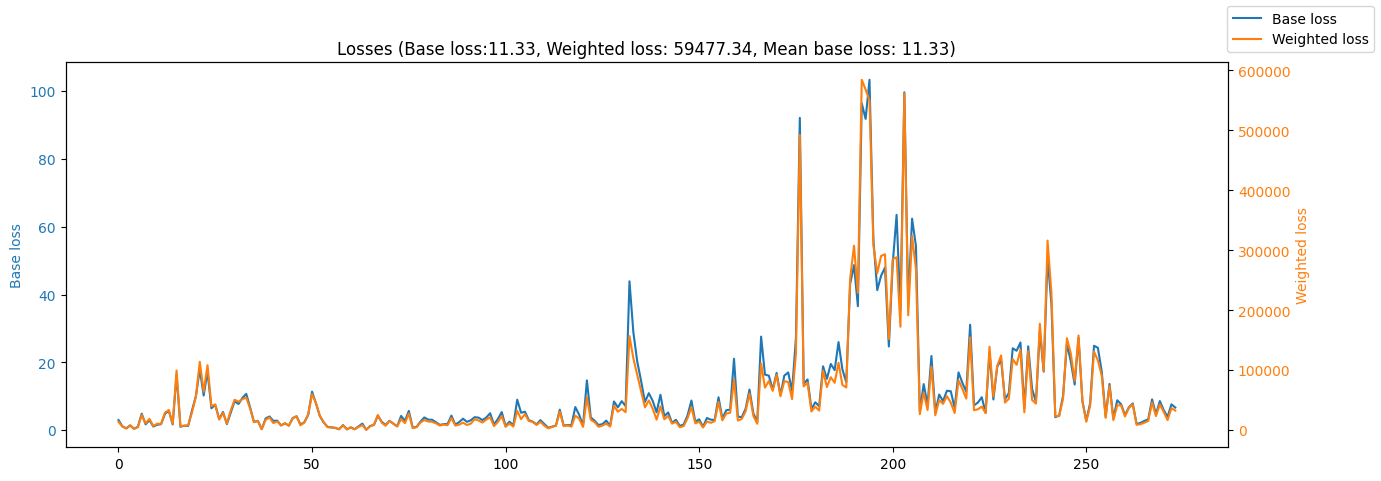

In [50]:
plot_losses(dtr_base_loss, dtr_weighted_loss)